## Observations based on data

1. Within the group that used Capomulin, there is a positive correlation between average tumor volume and the weight of the mouse.
2. Capomulin and Ramicane are successful at shrinking the tumor volume.
3. Although Infubinol and Ceftamin were also successful, they didn't have the same success rate as Capomulin and Ramicane.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

#mouse dataframe
mouse_metadata_df = pd.DataFrame(mouse_metadata)

In [2]:
#Dropping duplicate rows
cleaned_full_data_df = full_data_df.drop_duplicates()
cleaned_full_data_df.sort_values('Drug Regimen')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
333,j119,Capomulin,Female,7,23,25,42.417166,1
296,b742,Capomulin,Male,7,21,30,39.167949,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
...,...,...,...,...,...,...,...,...
645,c264,Zoniferol,Female,11,27,35,61.074795,2
646,c264,Zoniferol,Female,11,27,40,65.708323,2
647,c264,Zoniferol,Female,11,27,45,67.942121,2
1249,n967,Zoniferol,Male,11,27,10,47.471723,1


# Summary Statistics

In [3]:
#grouped dataframe by drug regiment
grouped_by_drug_df = cleaned_full_data_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
sum_df = pd.DataFrame({"Mean": grouped_by_drug_df['Tumor Volume (mm3)'].mean(), 
                      "Median": grouped_by_drug_df['Tumor Volume (mm3)'].median(),
                      "Variance": grouped_by_drug_df['Tumor Volume (mm3)'].var(),
                      "Standard Deviation": grouped_by_drug_df['Tumor Volume (mm3)'].std(),
                      "SEM": grouped_by_drug_df["Tumor Volume (mm3)"].sem()})
sum_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar Charts

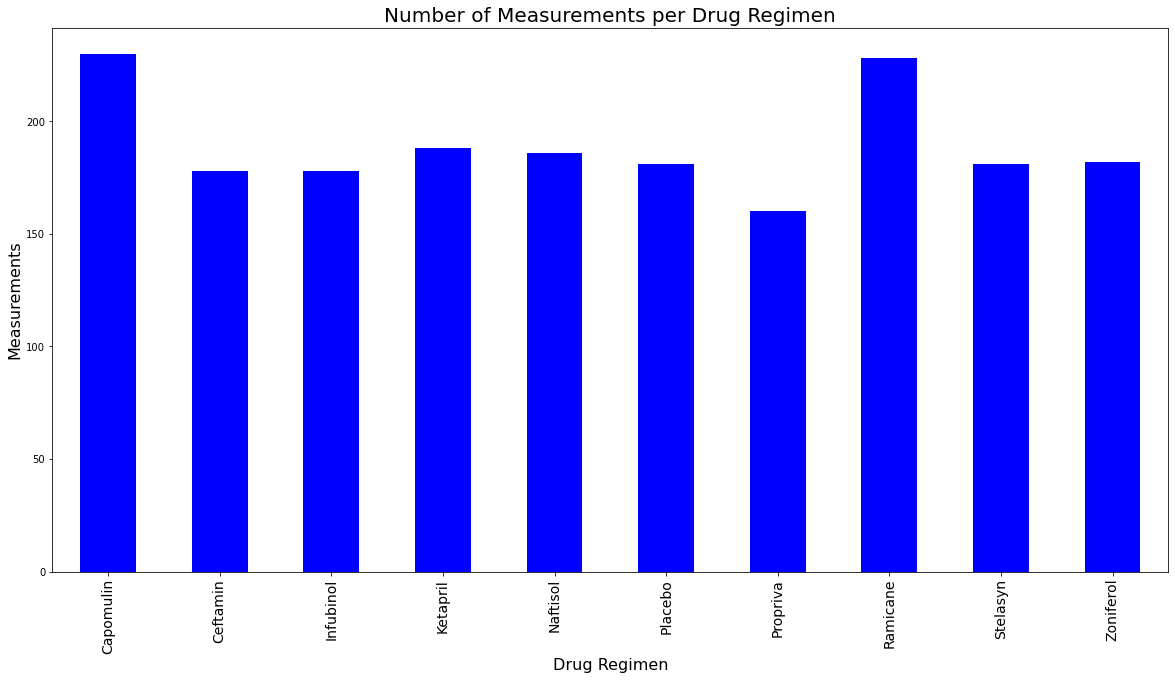

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#creating count of measurements
regimen_count = grouped_by_drug_df['Tumor Volume (mm3)'].count()

#plot with pandas
regimen_count_chart= regimen_count.plot(kind="bar", color='blue', figsize=(20,10))

#plot labels 
regimen_count_chart.set_title("Number of Measurements per Drug Regimen", fontsize=20)
regimen_count_chart.set_ylabel("Measurements", fontsize=16)
regimen_count_chart.set_xlabel("Drug Regimen", fontsize=16)
regimen_count_chart.set_xticklabels(regimen_count.index.values, fontsize=14, rotation="vertical")
plt.show()

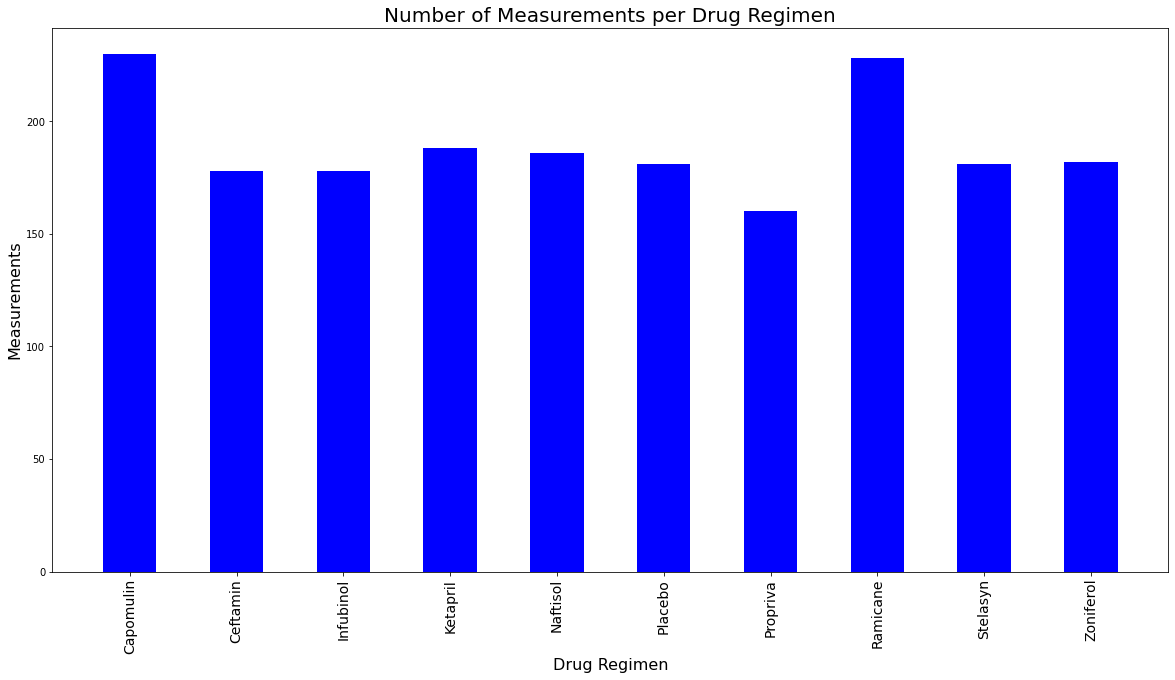

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(grouped_by_drug_df))
plt.figure(figsize=(20,10))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, regimen_count, color="blue", alpha=1, align='center', width=.5)

#plot labels
plt.xticks(tick_locations, regimen_count.index.values, fontsize=14, rotation="vertical")
plt.title("Number of Measurements per Drug Regimen", fontsize=20)
plt.ylabel("Measurements", fontsize=16)
plt.xlabel("Drug Regimen", fontsize=16)
plt.show()


# Pie Charts

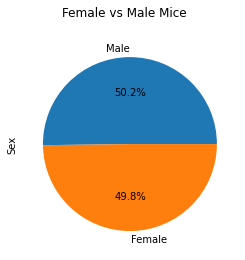

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
num_of_mice=mouse_metadata_df['Sex'].value_counts()
num_of_mice.plot(kind='pie', subplots=True, autopct="%.1f%%", title='Female vs Male Mice')
plt.show()

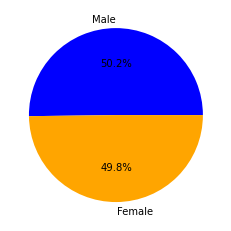

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
num_of_female_mice = len(mouse_metadata_df.loc[mouse_metadata_df['Sex'] == "Female"])
num_of_male_mice = len(mouse_metadata_df.loc[mouse_metadata_df['Sex'] == "Male"])

labels=["Male", "Female"]
numbers = [num_of_male_mice, num_of_female_mice]
colors= ["blue", "orange"]
explode=[0,0]

plt.pie(numbers, explode=explode,labels=labels, colors=colors, autopct="%.1f%%")
plt.show()

# Quartiles and IQR

In [29]:
#getting the final tumor volume for drug regimen capomulin
final_tumor_volume= cleaned_full_data_df.loc[cleaned_full_data_df['Drug Regimen']== 'Capomulin', :]
final_tumor_volume = final_tumor_volume.loc[final_tumor_volume['Timepoint']== 45]
final_tumor_volume_cap = final_tumor_volume['Tumor Volume (mm3)']

#getting the final tumor volume for drug regimen Ramicane
final_tumor_volume= cleaned_full_data_df.loc[cleaned_full_data_df['Drug Regimen']== 'Ramicane', :]
final_tumor_volume = final_tumor_volume.loc[final_tumor_volume['Timepoint']== 45]
final_tumor_volume_ram = final_tumor_volume['Tumor Volume (mm3)']

#getting the final tumor volume for drug regimen Infubinol
final_tumor_volume= cleaned_full_data_df.loc[cleaned_full_data_df['Drug Regimen']== 'Infubinol', :]
final_tumor_volume = final_tumor_volume.loc[final_tumor_volume['Timepoint']== 45]
final_tumor_volume_inf = final_tumor_volume['Tumor Volume (mm3)']

#getting the final tumor volume for drug regimen Ceftamin
final_tumor_volume= cleaned_full_data_df.loc[cleaned_full_data_df['Drug Regimen']== 'Ceftamin', :]
final_tumor_volume = final_tumor_volume.loc[final_tumor_volume['Timepoint']== 45]
final_tumor_volume_cef = final_tumor_volume['Tumor Volume (mm3)']


In [27]:
#calculating quartiles for capomulin
quartiles = final_tumor_volume_cap.quantile([.25,.5,.75])
lowerqcap = quartiles[0.25]
upperqcap = quartiles[0.75]
iqr = upperqcap-lowerqcap

lower_bound_cap = lowerqcap - (1.5*iqr)
upper_bound_cap = upperqcap + (1.5*iqr)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [31]:
#calculating quartiles for ramicane
quartiles = final_tumor_volume_ram.quantile([.25,.5,.75])
lowerqram = quartiles[0.25]
upperqram = quartiles[0.75]
iqr = upperqram-lowerqram

lower_bound_ram = lowerqram - (1.5*iqr)
upper_bound_ram = upperqram + (1.5*iqr)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")

Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [32]:
#calculating quartiles for infubinol
quartiles = final_tumor_volume_inf.quantile([.25,.5,.75])
lowerqinf = quartiles[0.25]
upperqinf = quartiles[0.75]
iqr = upperqinf-lowerqinf

lower_bound_inf = lowerqinf - (1.5*iqr)
upper_bound_inf = upperqinf + (1.5*iqr)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [33]:
#calculating quartiles for ceftamin
quartiles = final_tumor_volume_cef.quantile([.25,.5,.75])
lowerqinf = quartiles[0.25]
upperqinf = quartiles[0.75]
iqr = upperqinf-lowerqinf

lower_bound_inf = lowerqinf - (1.5*iqr)
upper_bound_inf = upperqinf + (1.5*iqr)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


# Box and Whisker plots

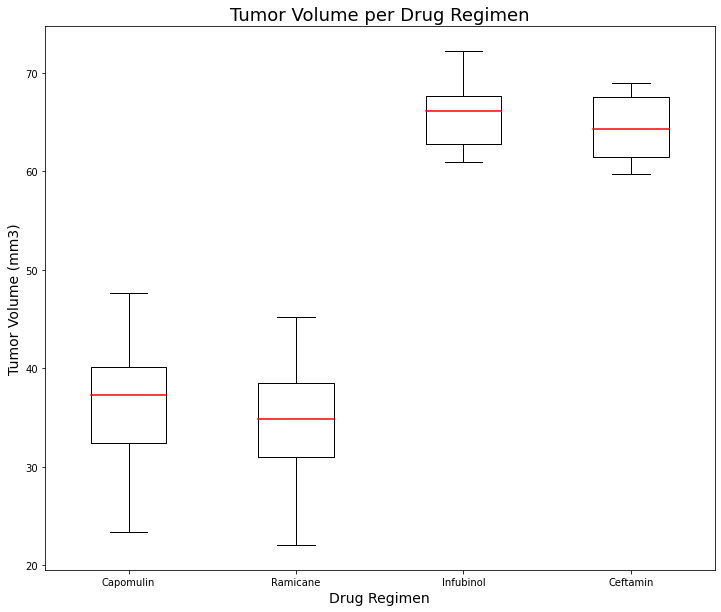

In [34]:
#data for boxplots
cap = final_tumor_volume_cap 
ram = final_tumor_volume_ram
inf = final_tumor_volume_inf
cef = final_tumor_volume_cef
data = [cap, ram, inf, cef] 

#creation of figure  
fig = plt.figure(figsize =(12, 10)) 
ax = fig.add_subplot(111) 

#creation and customize boxplots
bp = ax.boxplot(data)
plt.setp(bp['fliers'], color='red', marker='+')
plt.setp(bp['medians'], color='red', linewidth = 1.5)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=14)
ax.set_xlabel('Drug Regimen', fontsize=14)
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']) 
plt.title("Tumor Volume per Drug Regimen", fontsize=18) 
plt.show(bp) 

# Line and Scatter Plots

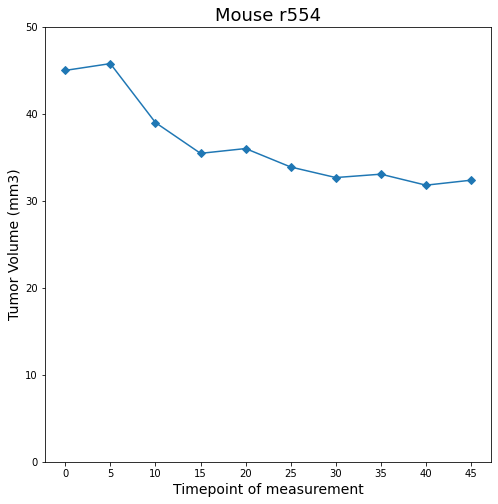

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#chosen mouse is r554
mouse_df = cleaned_full_data_df.loc[cleaned_full_data_df['Mouse ID']== 'r554']

#generate line plot
fig2 = plt.figure(figsize=(8, 8))
plt.ylim(0, 50)

x_axis = mouse_df['Timepoint']
y_axis = mouse_df['Tumor Volume (mm3)']

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [0, 5, 10, 15, 20, 25, 30, 35, 40, 45])

plt.plot(x_axis, y_axis, marker="D")

#plot labels
plt.title("Mouse r554", fontsize=18)
plt.xlabel("Timepoint of measurement", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.show()



In [37]:
# Calculate the average tumor volume for Capomulin
mouse_cap_treatment =  mouse_metadata.loc[mouse_metadata['Drug Regimen']== 'Capomulin', :]
mouse_tumor_cap =  cleaned_full_data_df.loc[cleaned_full_data_df['Drug Regimen']== 'Capomulin', :]
grouped_by_mouse = mouse_tumor_cap.groupby("Mouse ID") 

#merge dataframe to make chart
avg_tumor_per_mouse_df = pd.merge(grouped_by_mouse["Tumor Volume (mm3)"].mean(), mouse_cap_treatment, on="Mouse ID")

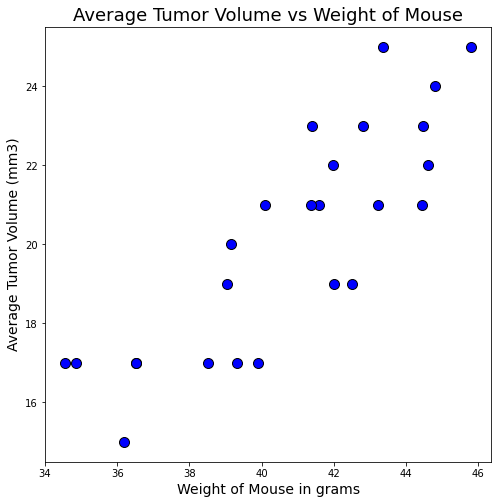

In [39]:
#generate the scatter plot
fig3 = plt.figure(figsize=(8, 8))
y_axis = avg_tumor_per_mouse_df["Weight (g)"]
x_axis = avg_tumor_per_mouse_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, s=100, marker="o", facecolors="blue", edgecolors='black')

#plot labels
plt.xlabel("Weight of Mouse in grams", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.title("Average Tumor Volume vs Weight of Mouse", fontsize=18)
plt.show()




# Correlation and Regression with scatter plot

In [43]:
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between the weight of mouse and average tumor volume is {round(correlation[0],2)}.")

The correlation between the weight of mouse and average tumor volume is 0.84.


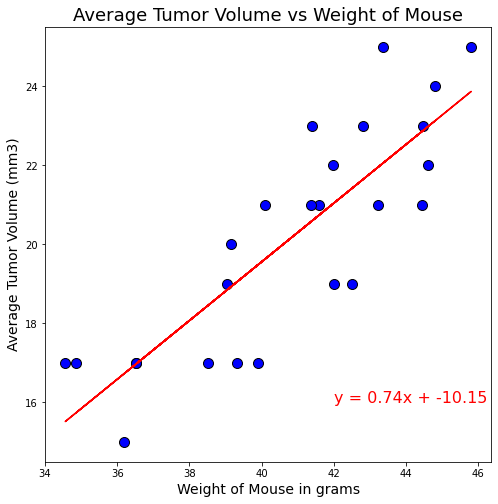

In [41]:
fig3 = plt.figure(figsize=(8, 8))
y_axis = avg_tumor_per_mouse_df["Weight (g)"]
x_axis = avg_tumor_per_mouse_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, s=100, marker="o", facecolors="blue", edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(42,16),fontsize=16, color="red")

plt.xlabel("Weight of Mouse in grams", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.title("Average Tumor Volume vs Weight of Mouse", fontsize=18)
#plt.tight_layout()
plt.show()


